# Data Collection

Load the California housing dataset from `data/raw`.


In [5]:
from pathlib import Path
import pandas as pd
from sys import path

def load_housing_data():
    data_path = Path("../data/raw/california_housing.csv")
    return  pd.read_csv(data_path)

housing_data_set = load_housing_data()
housing_data_set= housing_data_set.sort_values(by="population",ascending=True)
housing_data_set.head()
# housing_data_set.info()
# housing_data_set["ocean_proximity"].value_counts()
# housing_data_set.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
5342,-118.44,34.04,16.0,18.0,6.0,3.0,4.0,0.536,350000.0,<1H OCEAN
12458,-114.62,33.62,26.0,18.0,3.0,5.0,3.0,0.536,275000.0,INLAND
3126,-117.79,35.21,4.0,2.0,2.0,6.0,2.0,2.375,137500.0,INLAND
3125,-117.76,35.22,4.0,18.0,3.0,8.0,6.0,1.625,275000.0,INLAND
12286,-116.95,33.86,1.0,6.0,2.0,8.0,2.0,1.625,55000.0,INLAND


## Get insights from the data

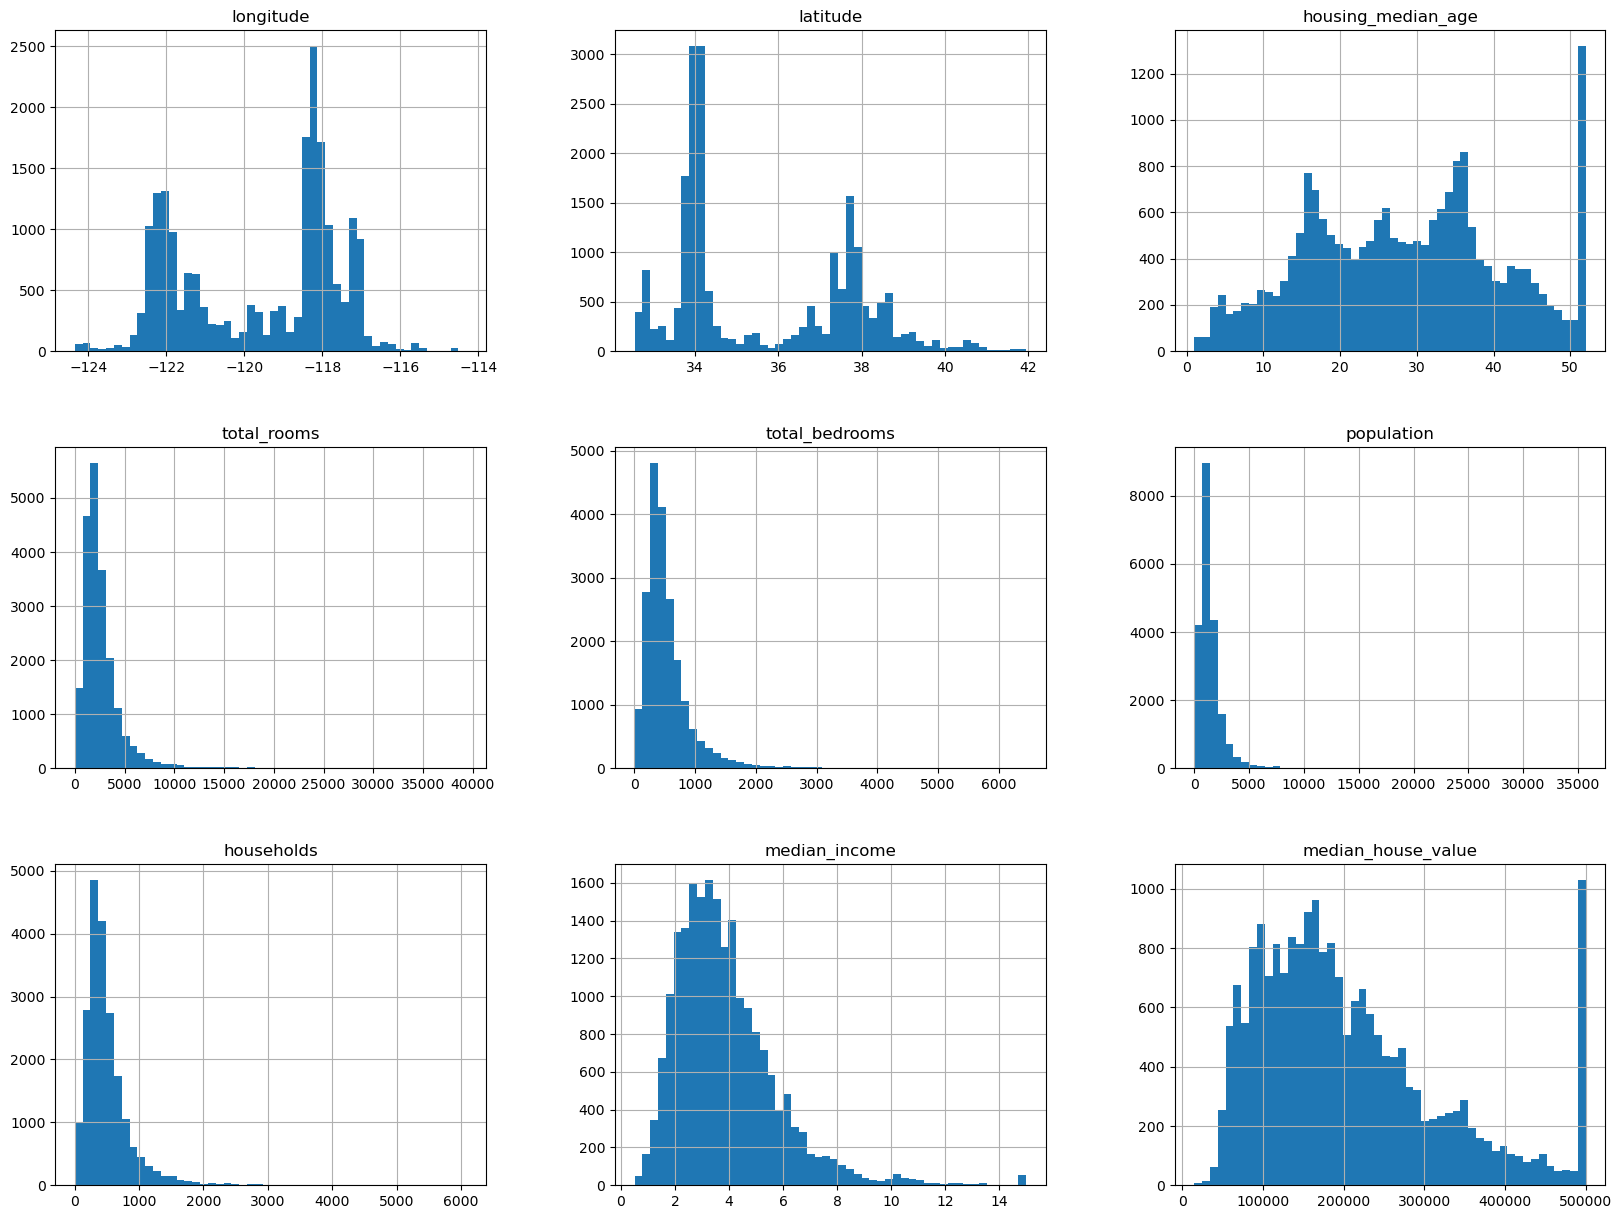

In [6]:
import matplotlib.pyplot as plt
housing_data_set.hist(bins=50,figsize=(20,15))
plt.show()

## Split train_test


In [7]:
import numpy as np
from sklearn.model_selection import train_test_split
# from zlib import crc32

# def test_set_check(identifier, test_ratio):
#     var = crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32
#     # print(var)
#     return var

# def split_train_test(data,test_ratio,id_column):
#     ids = data[id_column]
#     in_test_set = ids.apply(lambda id_:test_set_check(id_,test_ratio))
#     return data.loc[~in_test_set],data.loc[in_test_set]

# housing_data_set_with_id = housing_data_set.reset_index()

# train_set,test_set = split_train_test(housing_data_set_with_id,0.2,"index")

# # print(train_set.info())
train_set,test_set = train_test_split(housing_data_set,test_size=0.2,random_state=42)

# # print(housing_data_set_with_id.head())


5342     0.5360
12458    0.5360
3126     2.3750
3125     1.6250
12286    1.6250
          ...  
6057     6.0191
10309    7.4947
13139    4.9516
9880     2.3087
15360    2.5729
Name: median_income, Length: 20640, dtype: float64


/tmp/ipykernel_107180/4150035816.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing_data_set["income_cat"].where(housing_data_set["income_cat"] < 5, 5.0, inplace=True)


<Axes: >

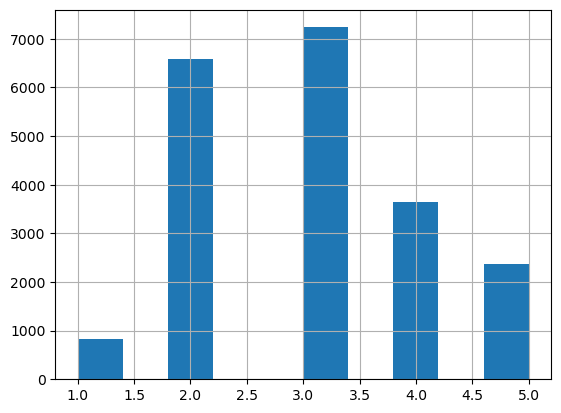

In [8]:
import numpy as np
# Chosing the strata
print(housing_data_set["median_income"])
housing_data_set["income_cat"] = np.ceil(housing_data_set["median_income"] / 1.5)
housing_data_set["income_cat"].where(housing_data_set["income_cat"] < 5, 5.0, inplace=True)
housing_data_set["income_cat"].hist()

In [16]:
# Stratify Sampling based on the income category

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
print(split)

for train_index,test_index in split.split(housing_data_set,housing_data_set["income_cat"]):
    strat_train_set = housing_data_set.loc[train_index]
    strat_test_set = housing_data_set.loc[test_index]


print(strat_test_set["income_cat"].value_counts() / len(strat_test_set))
print(housing_data_set["income_cat"].value_counts() / len(housing_data_set))
print(strat_train_set["income_cat"].value_counts() / len(strat_train_set))

for set_ in (strat_test_set,strat_train_set):
    set_.drop("income_cat",axis = 1,inplace = True )

StratifiedShuffleSplit(n_splits=1, random_state=42, test_size=0.2,
            train_size=None)
income_cat
3.0    0.363614
2.0    0.310320
4.0    0.173450
5.0    0.112161
1.0    0.040455
Name: count, dtype: float64
income_cat
3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: count, dtype: float64
income_cat
3.0    0.347323
2.0    0.320979
4.0    0.177023
5.0    0.115007
1.0    0.039668
Name: count, dtype: float64


## Working on training set separately

In [20]:
housing_train_set = train_set.copy()

## Visualizing geographical data

<Axes: xlabel='longitude', ylabel='latitude'>

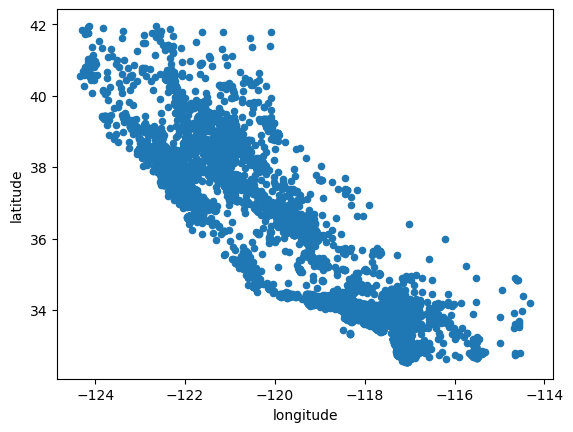

In [21]:
housing_train_set.plot(kind="scatter",x="longitude",y="latitude")

<Axes: xlabel='longitude', ylabel='latitude'>

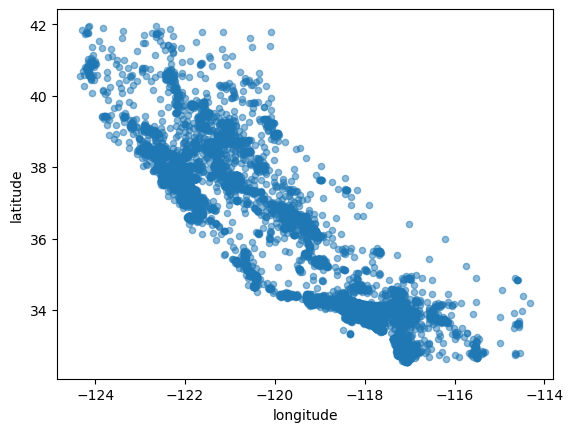

In [ ]:
housing_train_set.plot(kind="scatter",x="longitude",y="latitude",alpha=0.4)


## Enhancing the visualizations

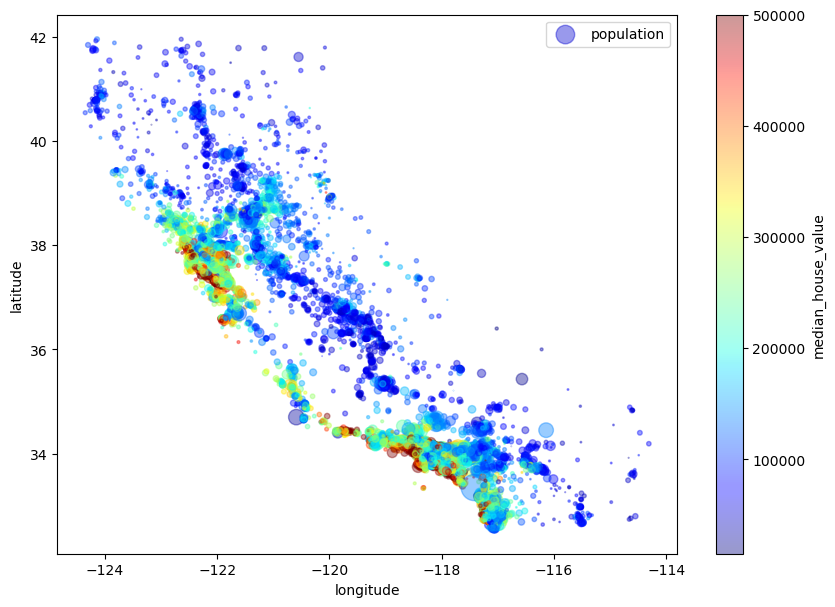

In [35]:
housing_train_set.plot(kind="scatter" , x = "longitude", y = "latitude",alpha = 0.4, 
s = housing_train_set["population"] / 100, label = "population", figsize = (10,7),
c ="median_house_value",cmap = "jet",colorbar = True)                

plt.legend()


## Finding the relationship between different numeric_columns

In [ ]:
import numpy as np
num_df = housing_train_set.select_dtypes(include=[np.number])
corr_matrix = num_df.corr()
# corr_matrix
corr_matrix["median_house_value"].sort_values(ascending=False)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924194,-0.110790,0.042013,0.068198,0.099512,0.054309,-0.016722,-0.044683
latitude,-0.924194,1.000000,0.012685,-0.033256,-0.065673,-0.108941,-0.070280,-0.077606,-0.144869
housing_median_age,-0.110790,0.012685,1.000000,-0.362182,-0.321271,-0.297573,-0.303234,-0.115123,0.110611
total_rooms,0.042013,-0.033256,-0.362182,1.000000,0.928388,0.855624,0.918341,0.204888,0.137100
total_bedrooms,0.068198,-0.065673,-0.321271,0.928388,1.000000,0.876746,0.979959,-0.005092,0.051274
population,0.099512,-0.108941,-0.297573,0.855624,0.876746,1.000000,0.906353,0.006367,-0.024045
households,0.054309,-0.070280,-0.303234,0.918341,0.979959,0.906353,1.000000,0.016069,0.066385
median_income,-0.016722,-0.077606,-0.115123,0.204888,-0.005092,0.006367,0.016069,1.000000,0.690615
median_house_value,-0.044683,-0.144869,0.110611,0.137100,0.051274,-0.024045,0.066385,0.690615,1.000000
